In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
device = torch.device("cuda")
mnist_train = torchvision.datasets.MNIST(root='~/test/Datasets/MNIST',train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='~/test/Datasets/MNIST',train=False, download=True, transform=transforms.ToTensor())
batch_size = 256
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,shuffle=True, num_workers=2)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,shuffle=False, num_workers=2)
num_inputs,num_hiddens,num_outputs = 784,256,10

In [2]:
#ReLU
class ReLUNet(nn.Module):
    def __init__(self):
        super(ReLUNet,self).__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(num_inputs,num_hiddens)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(num_hiddens,num_outputs)
    def forward(self,x):
        y = self.flatten(x)
        y = self.linear1(y)
        y = self.relu(y)
        y = self.linear2(y)
        return y

In [3]:
#leakyReLU
class LeakyReLUNet(nn.Module):
    def __init__(self):
        super(LeakyReLUNet,self).__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(num_inputs,num_hiddens)
        self.leakyrelu = nn.LeakyReLU()
        self.linear2 = nn.Linear(num_hiddens,num_outputs)
    def forward(self,x):
        y = self.flatten(x)
        y = self.linear1(y)
        y = self.leakyrelu(y)
        y = self.linear2(y)
        return y

In [4]:
#eLU
class eLUNet(nn.Module):
    def __init__(self):
        super(eLUNet,self).__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(num_inputs,num_hiddens)
        self.elu = nn.ELU()
        self.linear2 = nn.Linear(num_hiddens,num_outputs)
    def forward(self,x):
        y = self.flatten(x)
        y = self.linear1(y)
        y = self.elu(y)
        y = self.linear2(y)
        return y

In [5]:
#sigmoid
class SigmoidNet(nn.Module):
    def __init__(self):
        super(SigmoidNet,self).__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(num_inputs,num_hiddens)
        self.sigmoid = nn.Sigmoid()
        self.linear2 = nn.Linear(num_hiddens,num_outputs)
    def forward(self,x):
        y = self.flatten(x)
        y = self.linear1(y)
        y = self.sigmoid(y)
        y = self.linear2(y)
        return y

In [6]:
#tanh
class TanhNet(nn.Module):
    def __init__(self):
        super(TanhNet,self).__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(num_inputs,num_hiddens)
        self.tanh = nn.Tanh()
        self.linear2 = nn.Linear(num_hiddens,num_outputs)
    def forward(self,x):
        y = self.flatten(x)
        y = self.linear1(y)
        y = self.tanh(y)
        y = self.linear2(y)
        return y

In [7]:
def evaluate_accuracy(data_iter,net,loss):
    acc_sum,n=0.0,0
    test_l_sum=0.0
    for X,y in data_iter:
        X = X.to(device)
        y = y.to(device)        
        acc_sum+=(net(X).argmax(dim=1)==y).float().sum().item()
        l=loss(net(X),y).sum()
        test_l_sum+=l.item()
        n+=y.shape[0]
    return acc_sum/n,test_l_sum/n

In [8]:
num_epochs=20
lr=0.01
loss=nn.CrossEntropyLoss()

In [9]:
def train(net,train_iter,test_iter,loss,num_epochs,batch_size,params=None,lr=None,optimizer=None):
    train_loss=[]
    test_loss=[]
    for epoch in range(num_epochs):
        train_l_sum,train_acc_sum,n=0.0,0.0,0
        for X,y in train_iter:
            X = X.to(device)
            y = y.to(device)
            y_hat = net(X)
            l=loss(y_hat,y).sum()
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            l.backward()
            if optimizer is None:
                SGD(params,lr)
            else:
                optimizer.step()
            train_l_sum+=l.item()
            train_acc_sum+=(y_hat.argmax(dim=1)==y).sum().item()
            n+=y.shape[0]
        test_acc,test_l = evaluate_accuracy(test_iter,net,loss)
        train_loss.append(train_l_sum/n)
        test_loss.append(test_l)
        print('epoch%d,loss%.4f,train acc %3f,test acc %.3f'%(epoch+1,train_l_sum/n,train_acc_sum/n,test_acc))
    return train_loss,test_loss

In [10]:
net = ReLUNet()
net.to(device)
optimizer=torch.optim.SGD(net.parameters(),lr)
for params in net.parameters():
    nn.init.normal_(params,mean=0,std=0.01)

In [11]:
net2 = LeakyReLUNet()
net2.to(device)
optimizer2=torch.optim.SGD(net2.parameters(),lr)
for params in net2.parameters():
    nn.init.normal_(params,mean=0,std=0.01)

In [12]:
net3 = eLUNet()
net3.to(device)
optimizer3=torch.optim.SGD(net3.parameters(),lr)
for params in net3.parameters():
    nn.init.normal_(params,mean=0,std=0.01)

In [13]:
net4 = SigmoidNet()
net4.to(device)
optimizer4=torch.optim.SGD(net4.parameters(),lr)
for params in net3.parameters():
    nn.init.normal_(params,mean=0,std=0.01)

In [14]:
net5 = TanhNet()
net5.to(device)
optimizer5=torch.optim.SGD(net5.parameters(),lr)
for params in net3.parameters():
    nn.init.normal_(params,mean=0,std=0.01)

In [16]:
train_loss,test_loss=train(net,train_iter,test_iter,loss,num_epochs,batch_size,net.parameters(),lr,optimizer)

epoch1,loss0.0089,train acc 0.387917,test acc 0.547
epoch2,loss0.0080,train acc 0.624850,test acc 0.710
epoch3,loss0.0058,train acc 0.725883,test acc 0.757
epoch4,loss0.0040,train acc 0.783617,test acc 0.814
epoch5,loss0.0030,train acc 0.822200,test acc 0.839
epoch6,loss0.0025,train acc 0.843467,test acc 0.858
epoch7,loss0.0022,train acc 0.857917,test acc 0.870
epoch8,loss0.0020,train acc 0.868800,test acc 0.878
epoch9,loss0.0019,train acc 0.875517,test acc 0.885
epoch10,loss0.0018,train acc 0.880317,test acc 0.888
epoch11,loss0.0017,train acc 0.885050,test acc 0.893
epoch12,loss0.0016,train acc 0.888617,test acc 0.897
epoch13,loss0.0016,train acc 0.891933,test acc 0.899
epoch14,loss0.0015,train acc 0.893750,test acc 0.900
epoch15,loss0.0015,train acc 0.896467,test acc 0.902
epoch16,loss0.0014,train acc 0.898267,test acc 0.902
epoch17,loss0.0014,train acc 0.899483,test acc 0.904
epoch18,loss0.0014,train acc 0.901133,test acc 0.905
epoch19,loss0.0014,train acc 0.902483,test acc 0.906
ep

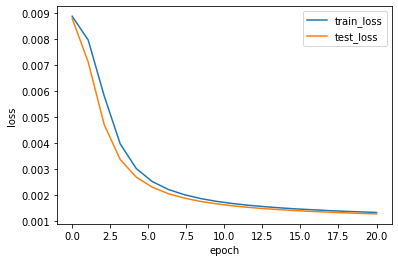

In [17]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(0,len(train_loss),len(train_loss))
plt.plot(x,train_loss,label='train_loss',linewidth=1.5)
plt.plot(x,test_loss,label='test_loss',linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [18]:
train_loss.clear()
test_loss.clear()
train_loss,test_loss=train(net2,train_iter,test_iter,loss,num_epochs,batch_size,net2.parameters(),lr,optimizer2)

epoch1,loss0.0089,train acc 0.441817,test acc 0.531
epoch2,loss0.0080,train acc 0.598700,test acc 0.671
epoch3,loss0.0059,train acc 0.708350,test acc 0.760
epoch4,loss0.0040,train acc 0.777700,test acc 0.810
epoch5,loss0.0031,train acc 0.819767,test acc 0.840
epoch6,loss0.0025,train acc 0.842667,test acc 0.856
epoch7,loss0.0022,train acc 0.858133,test acc 0.869
epoch8,loss0.0020,train acc 0.867800,test acc 0.878
epoch9,loss0.0019,train acc 0.875733,test acc 0.886
epoch10,loss0.0018,train acc 0.881150,test acc 0.889
epoch11,loss0.0017,train acc 0.885333,test acc 0.892
epoch12,loss0.0016,train acc 0.888683,test acc 0.896
epoch13,loss0.0016,train acc 0.891367,test acc 0.898
epoch14,loss0.0015,train acc 0.894700,test acc 0.901
epoch15,loss0.0015,train acc 0.896733,test acc 0.901
epoch16,loss0.0014,train acc 0.898233,test acc 0.904
epoch17,loss0.0014,train acc 0.899650,test acc 0.905
epoch18,loss0.0014,train acc 0.901567,test acc 0.906
epoch19,loss0.0014,train acc 0.903000,test acc 0.908
ep

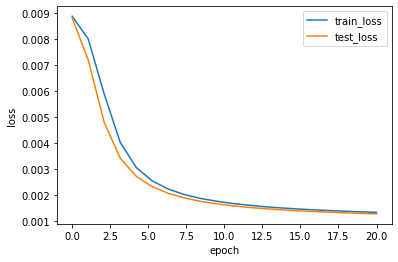

In [19]:
x=np.linspace(0,len(train_loss),len(train_loss))
plt.plot(x,train_loss,label='train_loss',linewidth=1.5)
plt.plot(x,test_loss,label='test_loss',linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [20]:
train_loss.clear()
test_loss.clear()
train_loss,test_loss=train(net3,train_iter,test_iter,loss,num_epochs,batch_size,net3.parameters(),lr,optimizer3)

epoch1,loss0.0087,train acc 0.552667,test acc 0.669
epoch2,loss0.0073,train acc 0.675733,test acc 0.706
epoch3,loss0.0049,train acc 0.736767,test acc 0.789
epoch4,loss0.0035,train acc 0.802967,test acc 0.828
epoch5,loss0.0028,train acc 0.832200,test acc 0.850
epoch6,loss0.0024,train acc 0.850083,test acc 0.863
epoch7,loss0.0021,train acc 0.862317,test acc 0.872
epoch8,loss0.0019,train acc 0.870917,test acc 0.881
epoch9,loss0.0018,train acc 0.876650,test acc 0.887
epoch10,loss0.0017,train acc 0.881683,test acc 0.890
epoch11,loss0.0016,train acc 0.885850,test acc 0.894
epoch12,loss0.0016,train acc 0.888900,test acc 0.895
epoch13,loss0.0015,train acc 0.891283,test acc 0.898
epoch14,loss0.0015,train acc 0.893467,test acc 0.899
epoch15,loss0.0015,train acc 0.895483,test acc 0.900
epoch16,loss0.0014,train acc 0.897467,test acc 0.901
epoch17,loss0.0014,train acc 0.898667,test acc 0.904
epoch18,loss0.0014,train acc 0.900167,test acc 0.905
epoch19,loss0.0014,train acc 0.901700,test acc 0.905
ep

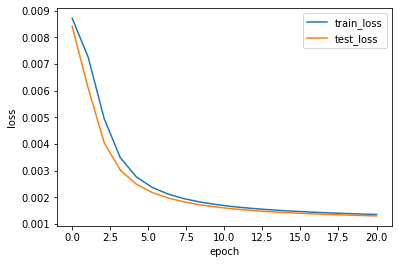

In [21]:
x=np.linspace(0,len(train_loss),len(train_loss))
plt.plot(x,train_loss,label='train_loss',linewidth=1.5)
plt.plot(x,test_loss,label='test_loss',linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [22]:
train_loss.clear()
test_loss.clear()
train_loss,test_loss=train(net4,train_iter,test_iter,loss,num_epochs,batch_size,net4.parameters(),lr,optimizer4)

epoch1,loss0.0089,train acc 0.208483,test acc 0.308
epoch2,loss0.0086,train acc 0.447083,test acc 0.551
epoch3,loss0.0082,train acc 0.579200,test acc 0.635
epoch4,loss0.0077,train acc 0.637033,test acc 0.689
epoch5,loss0.0071,train acc 0.674367,test acc 0.693
epoch6,loss0.0064,train acc 0.700933,test acc 0.741
epoch7,loss0.0058,train acc 0.731650,test acc 0.746
epoch8,loss0.0051,train acc 0.755150,test acc 0.767
epoch9,loss0.0046,train acc 0.774983,test acc 0.790
epoch10,loss0.0042,train acc 0.792183,test acc 0.805
epoch11,loss0.0038,train acc 0.804917,test acc 0.812
epoch12,loss0.0035,train acc 0.814383,test acc 0.826
epoch13,loss0.0033,train acc 0.823000,test acc 0.835
epoch14,loss0.0031,train acc 0.830083,test acc 0.841
epoch15,loss0.0029,train acc 0.836183,test acc 0.845
epoch16,loss0.0028,train acc 0.841683,test acc 0.850
epoch17,loss0.0026,train acc 0.846217,test acc 0.853
epoch18,loss0.0025,train acc 0.850550,test acc 0.858
epoch19,loss0.0024,train acc 0.853817,test acc 0.863
ep

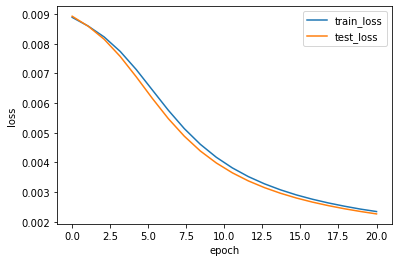

In [23]:
x=np.linspace(0,len(train_loss),len(train_loss))
plt.plot(x,train_loss,label='train_loss',linewidth=1.5)
plt.plot(x,test_loss,label='test_loss',linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [24]:
train_loss.clear()
test_loss.clear()
train_loss,test_loss=train(net5,train_iter,test_iter,loss,num_epochs,batch_size,net5.parameters(),lr,optimizer5)

epoch1,loss0.0072,train acc 0.635300,test acc 0.761
epoch2,loss0.0044,train acc 0.789650,test acc 0.827
epoch3,loss0.0031,train acc 0.832667,test acc 0.852
epoch4,loss0.0025,train acc 0.852450,test acc 0.869
epoch5,loss0.0022,train acc 0.864650,test acc 0.877
epoch6,loss0.0020,train acc 0.872683,test acc 0.886
epoch7,loss0.0018,train acc 0.878550,test acc 0.889
epoch8,loss0.0017,train acc 0.882567,test acc 0.892
epoch9,loss0.0016,train acc 0.886550,test acc 0.895
epoch10,loss0.0016,train acc 0.889817,test acc 0.897
epoch11,loss0.0015,train acc 0.892233,test acc 0.899
epoch12,loss0.0015,train acc 0.894567,test acc 0.900
epoch13,loss0.0015,train acc 0.896250,test acc 0.901
epoch14,loss0.0014,train acc 0.898133,test acc 0.903
epoch15,loss0.0014,train acc 0.899767,test acc 0.905
epoch16,loss0.0014,train acc 0.901133,test acc 0.906
epoch17,loss0.0014,train acc 0.902400,test acc 0.907
epoch18,loss0.0013,train acc 0.903500,test acc 0.908
epoch19,loss0.0013,train acc 0.904717,test acc 0.910
ep

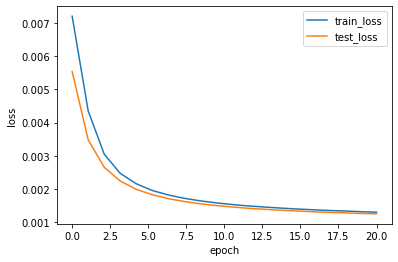

In [25]:
x=np.linspace(0,len(train_loss),len(train_loss))
plt.plot(x,train_loss,label='train_loss',linewidth=1.5)
plt.plot(x,test_loss,label='test_loss',linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()